In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import cPickle

Chip:  0 ---------------------------
mean:		0.455422827746
std dev:	0.168477111266
mean:		0.350235341458
std dev:	0.168635775164
mean:		0.430300185196
std dev:	0.210337293204
mean:		0.64783036652
std dev:	0.214828899319
Chip:  1 ---------------------------
mean:		0.527344050962
std dev:	0.171362532497
mean:		0.373977056639
std dev:	0.170341930533
mean:		0.421302645745
std dev:	0.216399805684
mean:		0.564334078081
std dev:	0.185213972675
Chip:  3 ---------------------------
mean:		0.702944634394
std dev:	0.276070658171
File don't exist!	Chip: 3 	SynID: 1
File don't exist!	Chip: 3 	SynID: 2
File don't exist!	Chip: 3 	SynID: 3
Chip:  4 ---------------------------
File don't exist!	Chip: 4 	SynID: 0
File don't exist!	Chip: 4 	SynID: 1
File don't exist!	Chip: 4 	SynID: 2
File don't exist!	Chip: 4 	SynID: 3
Chip:  5 ---------------------------
File don't exist!	Chip: 5 	SynID: 0
File don't exist!	Chip: 5 	SynID: 1
File don't exist!	Chip: 5 	SynID: 2
File don't exist!	Chip: 5 	SynID: 3
Chip: 

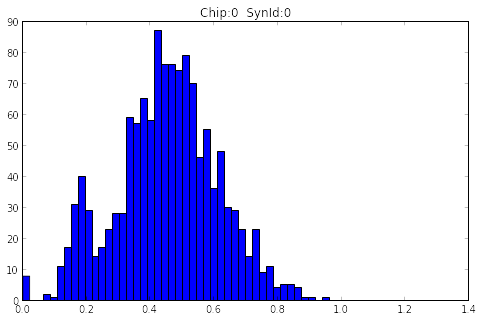

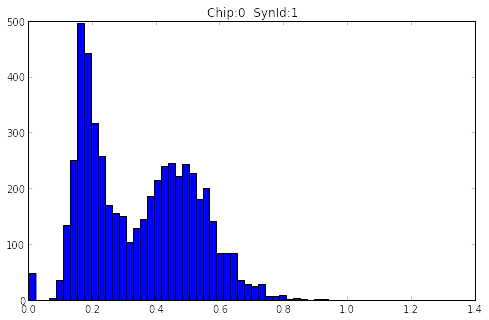

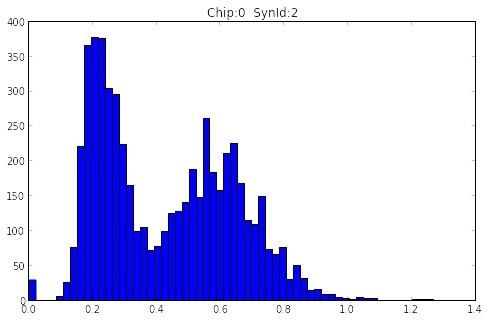

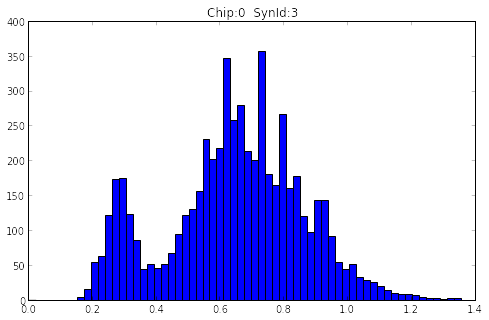

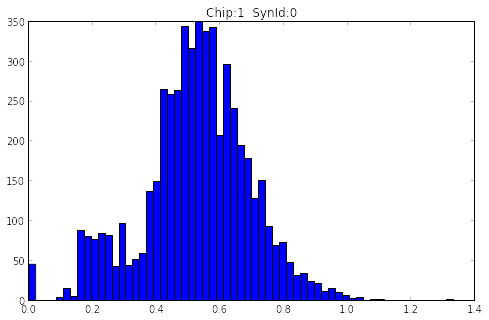

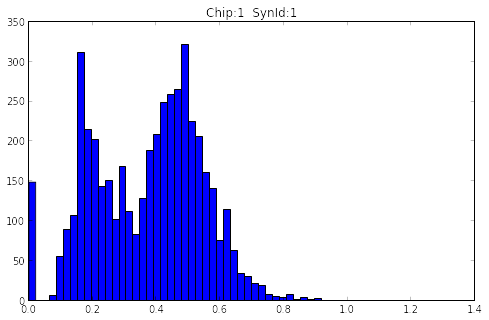

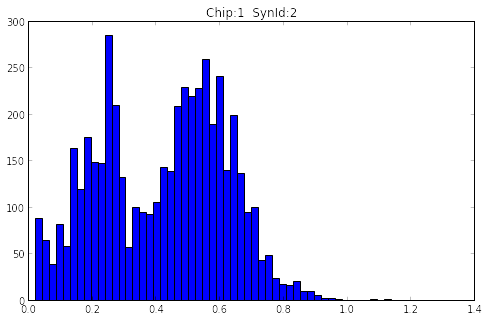

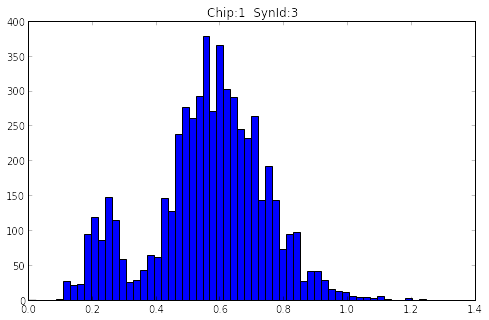

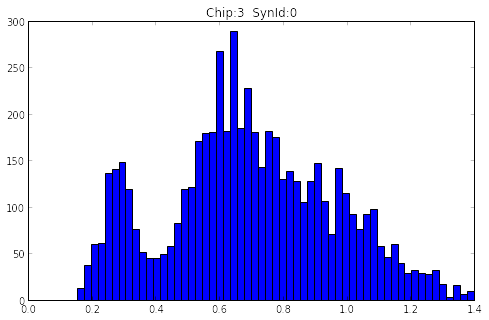

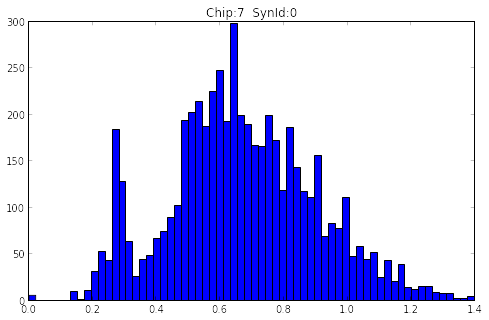

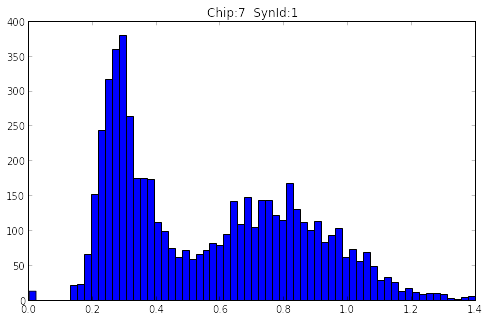

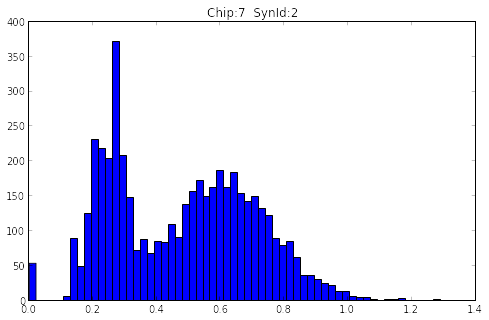

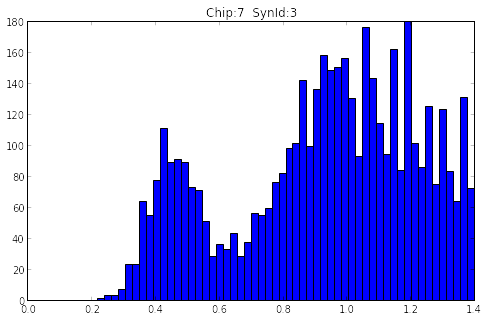

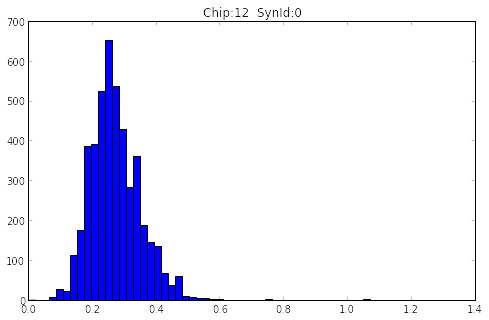

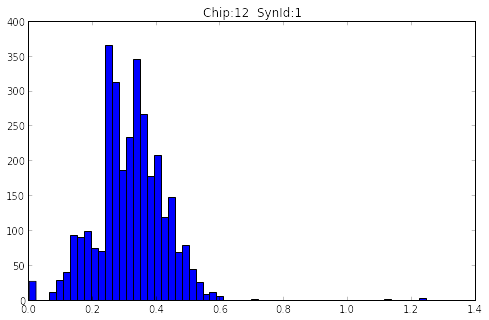

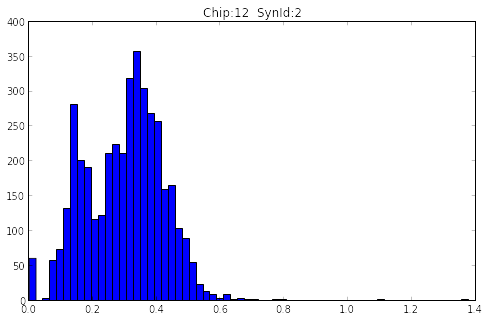

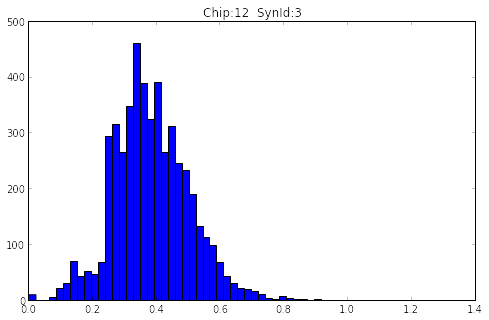

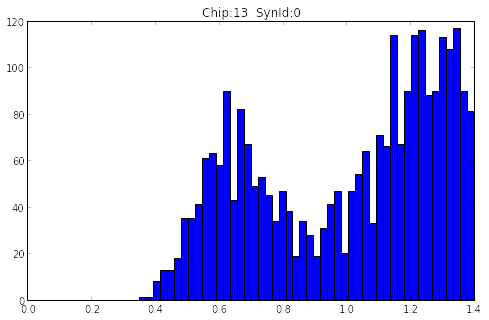

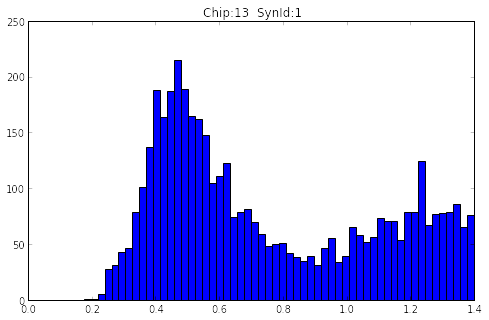

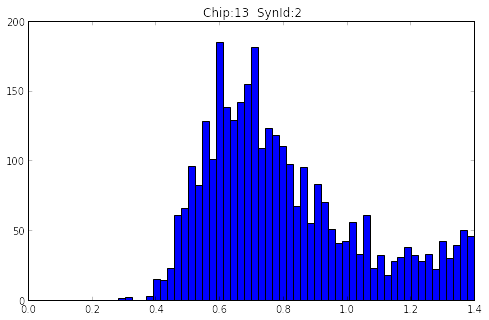

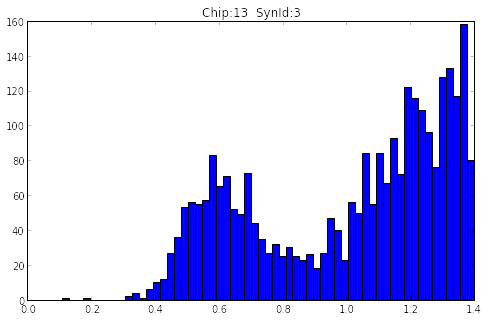

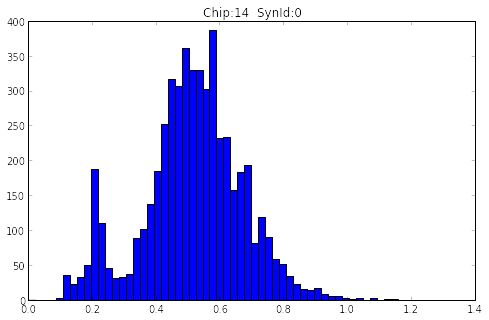

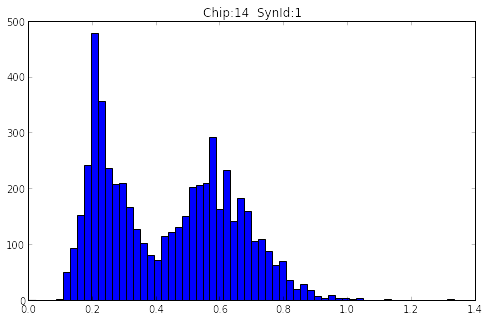

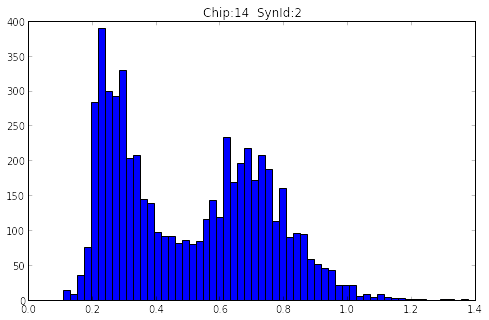

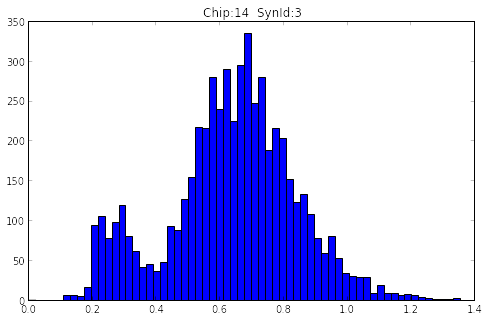

In [8]:
chip_ids = [0,1,3,4,5,6,7,8,9,10,11,12,13,14]
outputInfo = dict()
for curChip in chip_ids:
    print 'Chip: ', curChip, '---------------------------'
    for i in arange(0,4,1):
#         curPckFile = folder_root + '/packed_data/pquaValues_approx_' + board_id + '_chip'+ str(chip_id) + '.pck'
#         curPckFile = '/home/noza/data/oldCalibProcess_calibData/endeavour/chip3/run1.5/packed_data/prefValues_endeavour_chip3.pck'
#         curPckFile = '/home/noza/data/oldCalibProcess_calibData/endeavour/chip3/run1.5/packed_data/prefValues_endeavour_chip3.pck'
#         curPckFile = '/mnt/oldHD/home/noza/data/calibData/endeavour/chip7/run1/packed_data/pquaValues_endeavour_chip7.pck'
#         curPckFile = '/mnt/oldHD/home/noza/data/calibData/endeavour/chip'+str(curChip)+'/synCalib/packed_data/erevCoeffValues_endeavour_chip'+str(curChip)+'_syn'+str(i)+'.pck'
        curPckFile = '/mnt/oldHD/home/noza/data/calibData/endeavour/chip'+str(curChip)+'/synCalib/packed_data/gsatCoeffValues_endeavour_chip'+str(curChip)+'_syn'+str(i)+'.pck'

        if os.path.exists(curPckFile):
        #     print "Using calibrated p_qua packed file during soma validation"
#             print "\t", curPckFile
            pVals = cPickle.load(open(curPckFile))
            #         print pVals
            curVals1, curVals2 = pVals

            mask = ~isnan(curVals1)
#             print mask
            curVals1 = curVals1[mask]

            print 'mean:\t\t', mean(curVals1)
            print 'std dev:\t', std(curVals1)
#             print 'var:\t\t', var(curVals1)

            figure(figsize=(8,5))
            bins = linspace(0, 1.4, 65)
            title('Chip:'+str(curChip)+'  SynId:'+str(i))
            hist(curVals1,bins)
            
            outputInfo[curChip] = [curChip, i, mean(curVals1), std(curVals1)]            
        else:
            print "File don't exist!\tChip:", curChip, '\tSynID:', i
# cPickle.dump(outputInfo, open('/home/noza/EndeavourSynapseErevDistributionInfo.pck','w+'))
# cPickle.dump(outputInfo, open('/home/noza/EndeavourSynapseGsatDistributionInfo.pck','w+'))